# Assess overfitting

Previously we looked at the principle of splitting data in a training set and a test set. By validating with the test set we assess whether a model has a good generic performance. If the model does well on the training data but poorly on the validation set, there is probably a chance that the model is overfit. It is probably too complex and too sensitive to variation. With few features, we can plot the model to get a feel for it. But with many features it is more difficult. This notebook demonstrates the usage of learning curves to assess the performance. The modeling and plotting code can be found below:

In [2]:
# Packages we need
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
#functions we need
def model(X, y, degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    print(f'\nmodel outcome for degree {degree}:')
    print(f'intercept: {lin_reg.intercept_} coefficient {lin_reg.coef_}')
    return [lin_reg, poly_features]


def predict(X, model, poly_features, n=1000):
    X_pred=np.linspace(X.min(), X.max(), n).reshape(n, 1)
    X_pred_poly = poly_features.transform(X_pred)
    y_pred = model.predict(X_pred_poly)
    return [X_pred, y_pred]


#4. Plot the points and the regression curve
def plot_polynomial(X,y,X_pred,y_pred):
    plt.plot(X, y, "b.", label = 'Data')
    plt.plot(X_pred, y_pred, "r-", linewidth=2, label="model trainset")
    plt.ylabel('Average Temperature')
    plt.xlabel('Year')
    plt.title('Average temperature in the Netherlands -  TRAIN')
    plt.legend()
    plt.show()


## Learning curve
Another way to estimate whether a model is 'overfit' is by using a learning curve in which the performance of the training set and validation set is plotted as a function of the training data set size. Below we see the code that generates this plot.

In [4]:
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: training data
        X_val, y_val: test data
    """
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation data")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)     
    return 0


The above code uses parameter model of type object `pipeline`.
A pipeline is a series of steps in which data is transformed. Some pipelines can combine other pipelines in series or parallel, have multiple inputs or outputs, and so on. Machine learning uses these kinds of pipelines more often, sklearn has a pipeline. It has two main methods: `fit` and` predict`. Where `fit` learns and predicts` predict` on the basis of the learned model.

In our case, we feed the pipeline type model as follows:


In [ ]:
degree = 1
Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])

---
## An Example

Let us create some random data with a curve

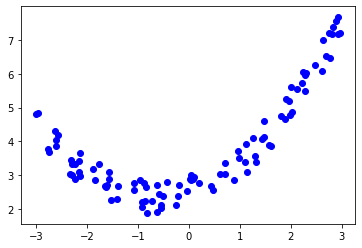

In [7]:
# Random data
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.4* x**2 + 0.5*x + 2 + np.random.rand(m, 1)
plt.scatter(x, y, color = 'b')

Let's see what a learning curve looks like for a straight line (degree = 1). We first model with the data and then plot the learning curve

In [8]:
# split de data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

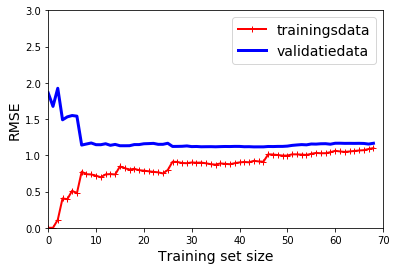

In [9]:
# model the data and plot the learningcurve
degree = 1
polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
plot_learning_curves(polynomial_regression, X_train, y_train, X_test, y_test)
plt.axis([0, len(X_train),0,3])
plt.show()


Let's analyze the curve. If there are only a few training samples, a straight line can still be made and the model fits perfectly. But as we add more data points, a straight line performs worse and the model's error goes up. This is of course because the data is not linear at all and the data is also somewhat spread out (the line is a curve and not all data fit on a line). When adding extra data, the error gets bigger but at some point it is stable. If we now look at the validation data, we can see that a linear model based on a few data points does not fit the validation data very well. It is not generic at all. But with multiple data points, the model learns so the error with the validation data becomes lower. But because the model does not fit very well, it also remains very stable towards the end at the same size of error.


Let's increase the degrees

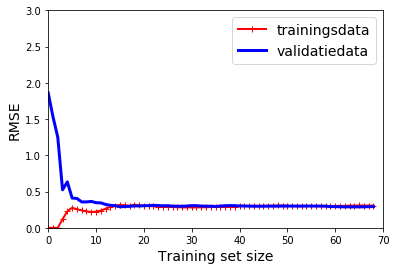

In [10]:
# Model the data and plot the learning curve for 2nd order polynomial
degree = 2
polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
plot_learning_curves(polynomial_regression, X_train, y_train, X_test, y_test)
plt.axis([0, len(X_train),0,3])
plt.show()

We now see that the validation set goes down faster, so it is better than the 1st order. Also the error is no greater

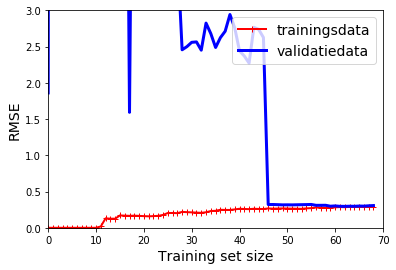

In [11]:
# Model the data and plot the learning curve for 10th order polynomial
degree = 10
polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
plot_learning_curves(polynomial_regression, X_train, y_train, X_test, y_test)
plt.axis([0, len(X_train),0,3])
plt.show()

If we change the number of degrees to 10 we see that the error of the training set is small, but the validation set performs worse than the training data, this is a typical case of ** overfitting **

---

# Exercise

We are now going to look at the temperature data of the polynomial regression assignment. We have already loaded and cleaned the data. This data is stored in a pickle file `temperature.pkl`. To evaluate the models, we now follow the following steps:

#### Load the data
1. Load the data into a data frame. To get a feel for the data, it is best to print and plot it

#### Prepare the data
2. Fill out the data frame X and y in the correct format (`reshape (-1,1`)
3. Normalize the data to a Z-score with `StandardScaler ()`
4. Split the data into train and test set using the method `train_test_split`

#### Model the data
Repeat for grades 1, 8 and 28

5. Model the data
6. Plot the data and the model
Plot the learning curve

#### Evaluate the models
8. Which order polynomial produces the least deviation (underfitting) and least variation (overfitting)? In other words, which learning curve looks best?

### Load and prepare the data

We load the pickle file using the annual values for X and Temperature values for Y.

In [57]:
# 1.Load the data
df= pd.read_csv('temperatuur.csv', header = None)
df.head()


In [1]:
# 2. prepare the data
# enter your code here to fill in y and X, use reshape for the correct format
# hint: look at the previous assignment

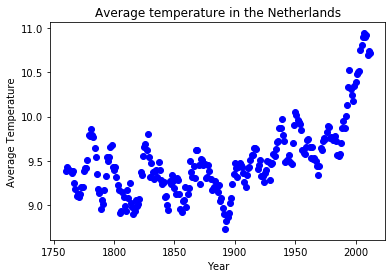

In [59]:
# Plot the data
plt.scatter(X, y, color = 'b')
plt.ylabel('Average Temperature')
plt.xlabel('Year')
plt.title('Average temperature in the Netherlands')
plt.show()

In [60]:
# 3. normalize data
# enter your code here to normalize X. use the StandardScaler
# hint: look at the previous assignment


# 4. Split the data
# enter your code here to split X and y into X_train, X_test, y_train, y_test. Use test_size = 0.3
# hint: look at the previous assignment

### Model the data and plot the learning curves

We are now going to model the data for different orders (degrees). Model, plot the data and model, and plot the learning curve. Do this for 2, 8 and 28 degrees



model outcome for degree 2:
intercept: [9.27713982] coefficient [[0.2436619  0.22118918]]


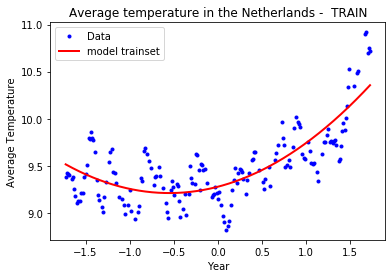

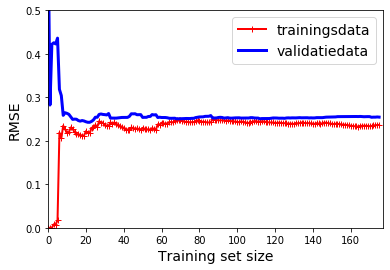

In [61]:
degree = 2

#Now follows a piece of code to plot the data and model
# 5. enter your code here to model the data using X_train, y_train and degree. 


# 6. plot the data and the model
# create X_pred, y_pred with the predict function at the top of the notebook
plot_polynomial (X_train, y_train, X_pred, y_pred)

# 7. Plot the learning curve
#hint: this code is already in this notebook

In [12]:
# do the same for degree = 8 and degree is 28

## Evaluete the models


What is the best model? Which learning curve has a little deviation (deviation is an indication for underfit) and little variation (variation is an indication for overfit)

## Challenge

Can you also use the pipeline code to plot the data and model instead of the code we used?